In [1]:
# 회귀분석 예제 코드(scikit-learn)

In [2]:
# 데이터 생성

In [4]:
pip install statsmodels

^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 640.0 kB/s eta 0:00:16
    --------------------------------------- 0.2/9.8 MB 2.0 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/9.8 MB 4.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.8 MB 6.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.8 MB 7.8 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 9.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.8 MB 9.5 MB/s eta 0:00:01
   --------------- ------------------------ 3.7/9.8 MB 10.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.1/9.8 MB 10.1 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.8 MB 10.3 MB/s eta 0:00:01
   --------------------- ------------------ 5.2/9.8 MB 10.7 MB/s eta 0:00:01
   -----------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


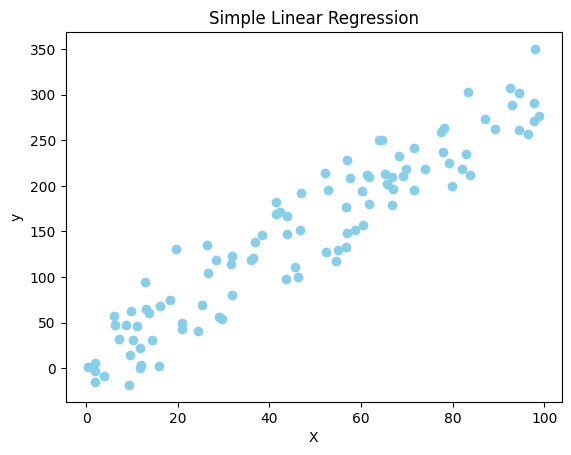

In [5]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 가상의 데이터 생성
np.random.seed(0)  # 결과의 일관성을 위해 시드 설정
X = np.random.rand(100, 1) * 100  # 독립 변수 (0~100 사이의 값 100개)
y = 3 * X + np.random.randn(100, 1) * 30  # 종속 변수 (기울기는 3, 잡음 추가)
X_sm = sm.add_constant(X)

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [6]:
# 모델 학습

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
# 모델 예측

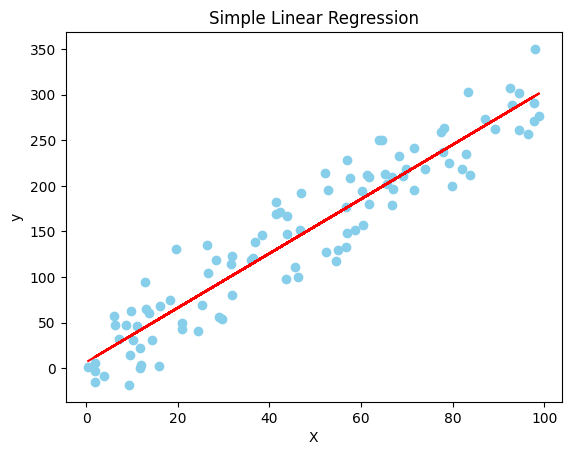

In [9]:
# 예측 및 모델 평가
y_pred = model.predict(X)

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도
plt.plot(X, y_pred, color='red')  # 회귀선
plt.title('Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [10]:
# 회귀 분석 예제코드(statsmodels)

In [13]:
# 6.1. 모델 학습
#[문제 2]
#statsmodels 라이브러리의 add_constant를 이용해 상수항을 추가해 봅시다.
#statsmodels 라이브러리의 OLS를 이용해 선형 회귀모델을 학습해 봅시다.


In [14]:
# 상수항 추가
X_sm = sm.add_constant(X)

# OLS (Ordinary Least Squares) 모델 생성 및 학습
model = sm.OLS(y, X_sm)
results = model.fit()

In [15]:
# 모델 예측

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     810.4
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           3.49e-49
Time:                        19:17:02   Log-Likelihood:                -481.63
No. Observations:                 100   AIC:                             967.3
Df Residuals:                      98   BIC:                             972.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6645      5.799      1.149      0.2

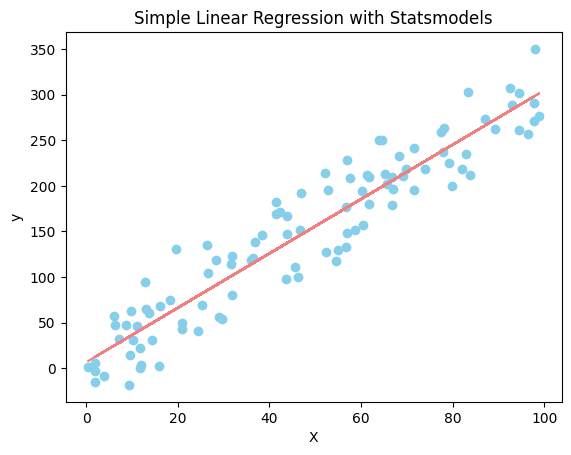

In [16]:
# 요약 결과 출력
print(results.summary())

# 데이터와 회귀선 시각화
plt.scatter(X, y, color='skyblue')  # 원본 데이터 산점도 (하늘색)
plt.plot(X, results.predict(X_sm), color='lightcoral')  # 회귀선 (밝은 주황색)
plt.title('Simple Linear Regression with Statsmodels')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [17]:
# 선형성 검증

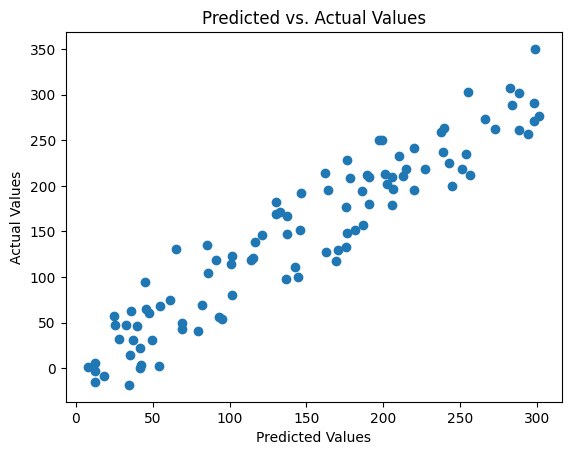

In [18]:
predicted_values = results.predict(X_sm)
plt.scatter(predicted_values, y)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs. Actual Values")
plt.show()

In [21]:
# 오차의 독립성 검증

In [22]:
print('Durbin-Watson:', sm.stats.durbin_watson(results.resid), '\n')

Durbin-Watson: 2.083225232123534 



In [23]:
print(results.summary()) # Durbin-Watson 확인

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     810.4
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           3.49e-49
Time:                        19:17:53   Log-Likelihood:                -481.63
No. Observations:                 100   AIC:                             967.3
Df Residuals:                      98   BIC:                             972.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6645      5.799      1.149      0.2

In [24]:
# 오차의 정규성 검증

In [25]:
from scipy import stats

# 잔차 계산
residuals = results.resid

# Shapiro-Wilk 테스트
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test:\nStatistic:", shapiro_test[0], "\np-Value:", shapiro_test[1])

# Kolmogorov-Smirnov(K-S) 검정
ks_test = stats.kstest(residuals, 'norm')
print("Kolmogorov-Smirnov Test:\nStatistic:", ks_test[0], "\np-Value:", ks_test[1])

Shapiro-Wilk Test:
Statistic: 0.9672574594314456 
p-Value: 0.013686444210489727
Kolmogorov-Smirnov Test:
Statistic: 0.4998424117503809 
p-Value: 1.257569853203881e-23


<Figure size 600x400 with 0 Axes>

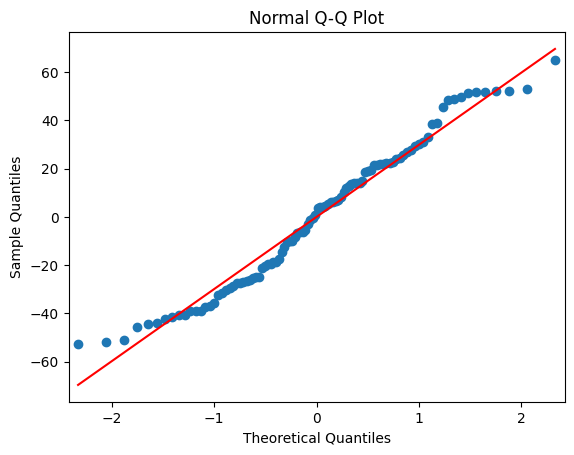

In [26]:
# Q-Q Plot
plt.figure(figsize=(6, 4))
sm.qqplot(residuals, line='s')
plt.title('Normal Q-Q Plot')
plt.show()

In [27]:
# 오차의 등분산성 검증

In [28]:
from statsmodels.stats.diagnostic import het_breuschpagan, het_goldfeldquandt

# 잔차 계산
residuals = results.resid

# Breusch-Pagan 테스트
bp_test = het_breuschpagan(residuals, results.model.exog)
print("Breusch-Pagan Test:\nStatistic:", bp_test[0], "\np-Value:", bp_test[1])

Breusch-Pagan Test:
Statistic: 0.037989958447137706 
p-Value: 0.8454633043549206


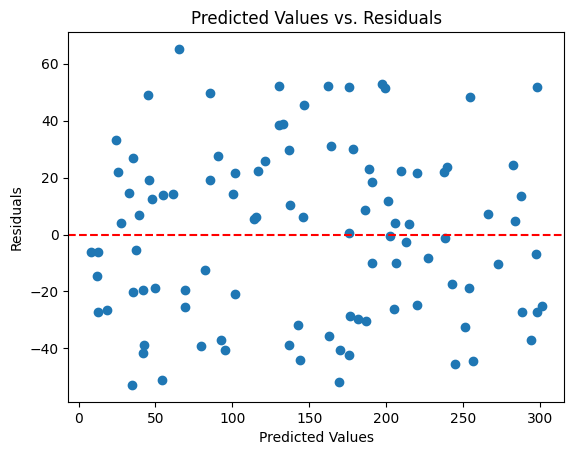

In [29]:
plt.scatter(predicted_values, results.resid)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [30]:
#다중공선성

In [31]:
#데이터생성

In [35]:
import pandas as pd

In [36]:
# 데이터셋 생성
np.random.seed(0)
X1 = np.random.rand(100) * 10  # 첫 번째 독립 변수
X2 = X1 + np.random.normal(0, 1, 100) * 2  # 두 번째 독립 변수, X1과 강한 상관 관계
X3 = np.random.rand(100) * 10  # 세 번째 독립 변수, 상대적으로 독립적
y = 5 + 2 * X1 + 3 * X2 + 7 * X3 + np.random.normal(0, 2, 100)  # 종속 변수

# DataFrame으로 변환
df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'y': y})
df

,X1,X2,X3,y
0,5.488135,3.157835,2.074701,41.355759
1,7.151894,8.953547,4.246855,77.281908
2,6.027634,6.958959,3.741700,62.672847
3,5.448832,2.376344,4.635754,52.710249
4,4.236548,7.213052,2.776287,51.380386
...,...,...,...,...
95,1.831914,3.195103,3.799270,45.543331
96,5.865129,4.258310,1.811510,40.657468
97,0.201075,-1.178024,7.885455,54.190682
98,8.289400,7.378335,0.568481,50.422235


In [37]:
#VIF(분산팽창요인)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF 계산
X = df[['X1', 'X2', 'X3']]
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  feature       VIF
0   const  5.858475
1      X1  3.112313
2      X2  3.218998
3      X3  1.064651
